In [8]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense


In [9]:
df=pd.read_csv('..\Dataset\Dataset.csv')

In [10]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,Caucasian,M,177.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,66119,13486,121,0,56.0,47.179671,0,Caucasian,F,183.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,8981,58179,195,0,48.0,27.236914,0,Caucasian,M,170.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,33776,120598,66,0,NaN,23.297481,0,Caucasian,F,154.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,91713.0,65606.079280,37795.088538,1.0,32852.0,65665.0,98342.0,131051.0
patient_id,91713.0,65537.131464,37811.252183,1.0,32830.0,65413.0,98298.0,131051.0
hospital_id,91713.0,105.669262,62.854406,2.0,47.0,109.0,161.0,204.0
hospital_death,91713.0,0.086302,0.280811,0.0,0.0,0.0,0.0,1.0
age,87485.0,62.309516,16.775119,16.0,52.0,65.0,75.0,89.0
...,...,...,...,...,...,...,...,...
hepatic_failure,90998.0,0.012989,0.113229,0.0,0.0,0.0,0.0,1.0
immunosuppression,90998.0,0.026165,0.159628,0.0,0.0,0.0,0.0,1.0
leukemia,90998.0,0.007066,0.083763,0.0,0.0,0.0,0.0,1.0
lymphoma,90998.0,0.004132,0.064148,0.0,0.0,0.0,0.0,1.0


In [12]:
df.shape

(91713, 186)

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    encounter_id                   int64  
 1    patient_id                     int64  
 2    hospital_id                    int64  
 3    hospital_death                 int64  
 4    age                            float64
 5    bmi                            float64
 6    elective_surgery               int64  
 7    ethnicity                      object 
 8    gender                         object 
 9    height                         float64
 10   hospital_admit_source          object 
 11   icu_admit_source               object 
 12   icu_id                         int64  
 13   icu_stay_type                  object 
 14   icu_type                       object 
 15   pre_icu_los_days               float64
 16   readmission_status             int64  
 17   weight                       

In [14]:
df.nunique().sort_values(ascending=False)

encounter_id             91713
patient_id               91713
bmi                      34888
urineoutput_apache       24772
pre_icu_los_days          9757
                         ...  
gcs_unable_apache            2
elective_surgery             2
gender                       2
apache_post_operative        2
readmission_status           1
Length: 186, dtype: int64

In [15]:
#readmission status has only one unique value so it can be removed. encounter_id ,icu_id ,hospital_id 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type'and patient_id also can be removed
df.duplicated().sum()

0

In [16]:
df.isna().sum().sort_values(ascending=False)

h1_bilirubin_min         84619
h1_bilirubin_max         84619
h1_lactate_max           84369
h1_lactate_min           84369
h1_albumin_max           83824
                         ...  
icu_type                     0
pre_icu_los_days             0
readmission_status           0
apache_post_operative        0
encounter_id                 0
Length: 186, dtype: int64

In [17]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        dtype= df.dtypes

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values',2:'dtype'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
         # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [18]:
missing_values_table_df=missing_values_table(df)
missing_values_table_df

Your selected dataframe has 186 columns.
There are 175 columns that have missing values.


,Missing Values,% of Total Values,dtype
h1_bilirubin_max,84619,92.3,float64
h1_bilirubin_min,84619,92.3,float64
h1_lactate_min,84369,92.0,float64
h1_lactate_max,84369,92.0,float64
h1_albumin_max,83824,91.4,float64
...,...,...,...
d1_sysbp_max,159,0.2,float64
d1_heartrate_max,145,0.2,float64
d1_heartrate_min,145,0.2,float64
icu_admit_source,112,0.1,object


**'We will be dropping with more than 25% of missing values'**

In [19]:
columns_drop=missing_values_table_df[missing_values_table_df['% of Total Values']>25].index.tolist()
columns_drop +=['encounter_id', 'readmission_status','icu_id' ,'hospital_id' ,'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'patient_id']
df.drop(columns_drop,axis=1,inplace=True)

In [20]:
#bmi is derived  from height and weight so we are deleting records which where BMI is null
bmi_index=df[df['bmi'].isna()].index
df.drop(bmi_index , inplace=True)
df.reset_index()
df

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,0,67.0,27.560000,0,Caucasian,M,190.5,Med-Surg ICU,0.000694,100.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,72.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.0,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.0,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,78.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,NaN,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,55.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [21]:
missing_values_table_df=missing_values_table(df)
missing_values_table_df

Your selected dataframe has 104 columns.
There are 96 columns that have missing values.


,Missing Values,% of Total Values,dtype
wbc_apache,21063,23.9,float64
h1_temp_max,20833,23.6,float64
h1_temp_min,20833,23.6,float64
hematocrit_apache,19005,21.5,float64
bun_apache,18289,20.7,float64
...,...,...,...
d1_sysbp_min,118,0.1,float64
d1_sysbp_max,118,0.1,float64
d1_heartrate_max,108,0.1,float64
d1_heartrate_min,108,0.1,float64


In [22]:
categorical_columns =missing_values_table_df[missing_values_table_df['dtype']=='object'].index.tolist()
categorical_columns

['apache_3j_bodysystem', 'apache_2_bodysystem', 'ethnicity', 'gender']

In [23]:
numerical_columns =missing_values_table_df[~(missing_values_table_df['dtype']=='object')].index.tolist()
numerical_columns

['wbc_apache',
 'h1_temp_max',
 'h1_temp_min',
 'hematocrit_apache',
 'bun_apache',
 'creatinine_apache',
 'sodium_apache',
 'd1_hco3_max',
 'd1_hco3_min',
 'd1_platelets_min',
 'd1_platelets_max',
 'd1_wbc_min',
 'd1_wbc_max',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_hemaglobin_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_min',
 'd1_hematocrit_max',
 'glucose_apache',
 'd1_bun_min',
 'd1_bun_max',
 'd1_creatinine_min',
 'd1_creatinine_max',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_potassium_max',
 'd1_potassium_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 'h1_diasbp_noninvasive_min',
 'h1_diasbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'h1_sysbp_noninvasive_max',
 'd1_glucose_max',
 'd1_glucose_min',
 'h1_mbp_min',
 'h1_mbp_max',
 'h1_resprate_min',
 'h1_resprate_max',
 'age',
 'h1_spo2_max',
 'h1_spo2_min',
 'temp_apache',
 'h1_diasbp_min',
 'h1_diasbp_max',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_h

In [24]:
unique_df = pd.DataFrame(df.nunique())
numerical_cat=unique_df[unique_df[0]==2].index.tolist()
numerical_cat

['hospital_death',
 'elective_surgery',
 'gender',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [25]:
for col in numerical_cat:
       if col in numerical_columns:
            df[col] = df[col].fillna(df[col].mode()[0])

In [26]:
for col in numerical_columns:
        if col not in numerical_cat:
                       df[col] = df[col].fillna(df[col].mean())


In [27]:
for col in categorical_columns:
       df[col] = df[col].fillna(df[col].mode()[0])

In [28]:
missing_values_table(df)

Your selected dataframe has 104 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,dtype


In [29]:
all_categorical=df.select_dtypes(include='O').T.index.tolist()

In [30]:
numerical=df.select_dtypes(exclude='O').T.index.tolist()
df

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.000000,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,73.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.000000,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,70.2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.000000,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,95.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.000000,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,61.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,0,67.000000,27.560000,0,Caucasian,M,190.5,Med-Surg ICU,0.000694,100.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.000000,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,72.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.000000,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.000000,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,78.9,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,62.341996,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,55.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [31]:
len(categorical_columns)

4

In [32]:
len(numerical_cat)

16

In [33]:
for col in numerical_cat:
    try:
        numerical.remove(col)
    except ValueError:
        pass



In [34]:
len(numerical)

84

<AxesSubplot:>

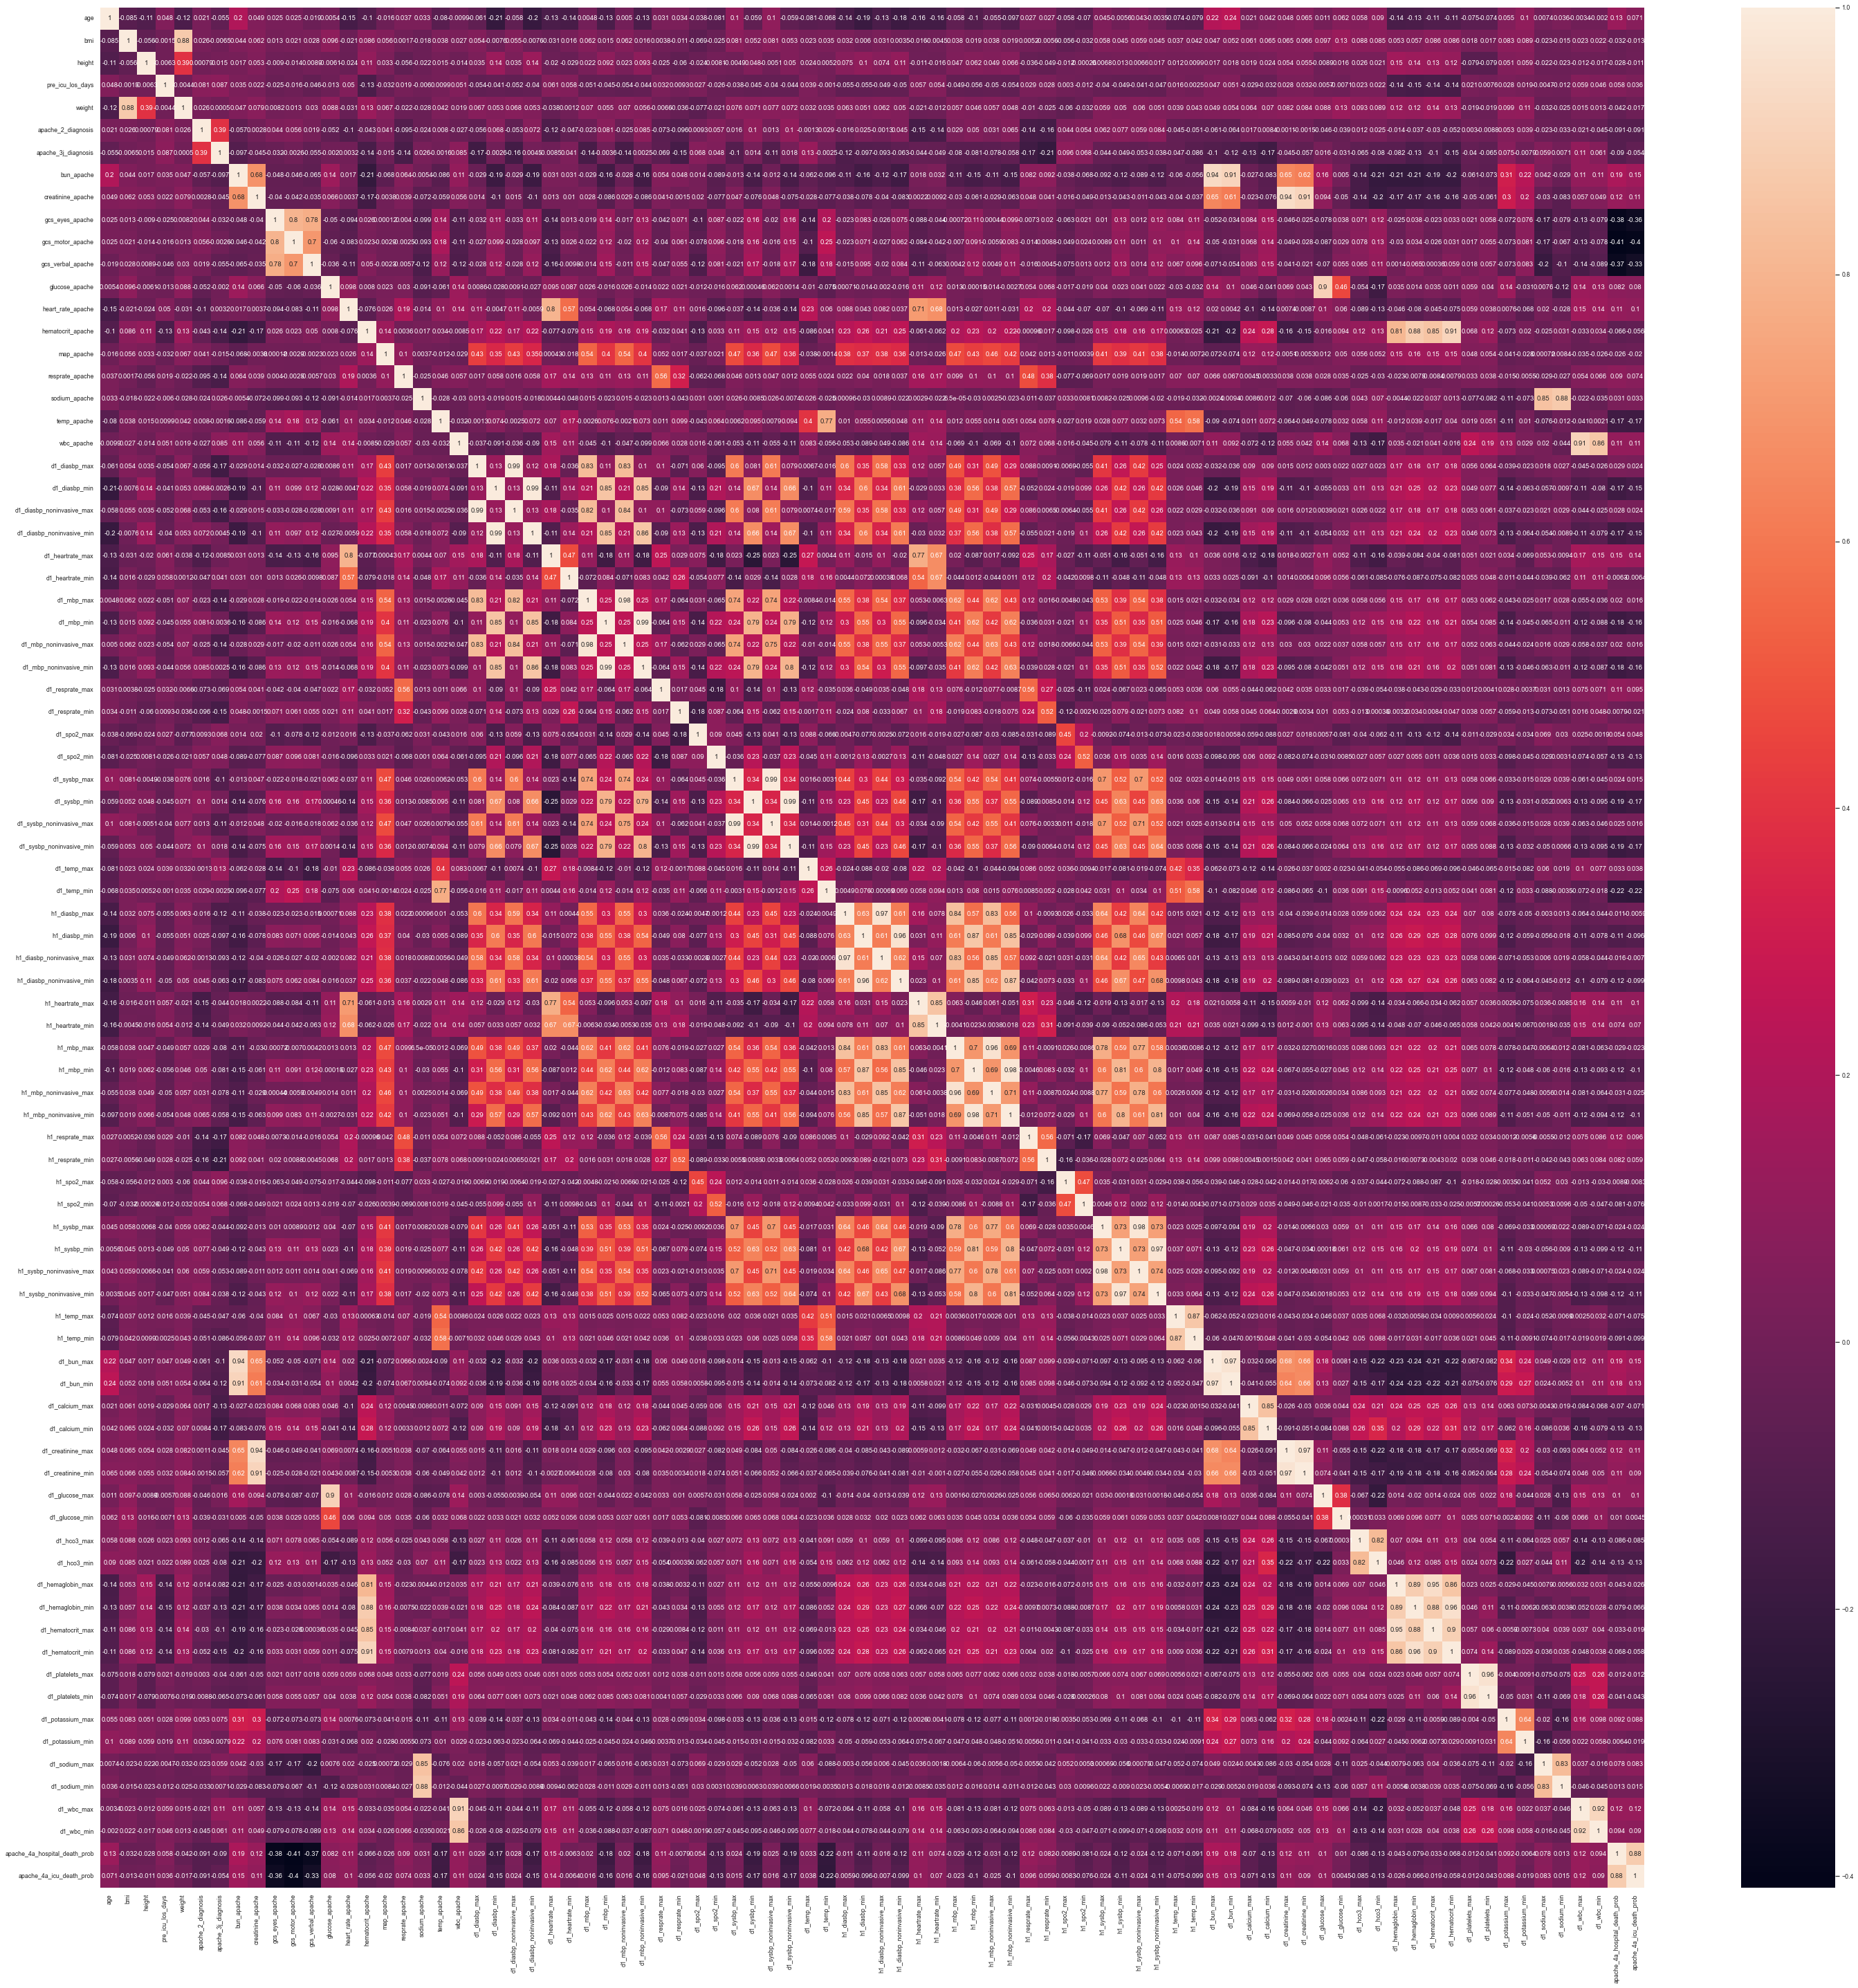

In [35]:
plt.figure(figsize=(50,50))
sns.set(font_scale=0.8)
sns.heatmap(df[numerical].corr(), annot=True)

In [36]:
c = df[numerical].corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
corr_df = pd.DataFrame(so[so>0.8]).reset_index()
corr_df[corr_df['level_0']!=corr_df['level_1']]

,level_0,level_1,0
0,heart_rate_apache,d1_heartrate_max,0.801317
1,d1_heartrate_max,heart_rate_apache,0.801317
2,h1_mbp_min,h1_sysbp_min,0.811435
3,h1_sysbp_min,h1_mbp_min,0.811435
4,hematocrit_apache,d1_hemaglobin_max,0.811773
...,...,...,...
117,d1_diasbp_max,d1_diasbp_noninvasive_max,0.992393
118,d1_sysbp_noninvasive_min,d1_sysbp_min,0.992602
119,d1_sysbp_min,d1_sysbp_noninvasive_min,0.992602
120,d1_diasbp_noninvasive_min,d1_diasbp_min,0.993100


In [37]:
correlated_features = set()
correlation_matrix = df[numerical].corr()
for i in range(len(correlation_matrix.columns)):
     for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) >0.8:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)
correlated_features=list(correlated_features)

In [38]:
correlated_features.sort()
correlated_features

['apache_4a_icu_death_prob',
 'd1_bun_max',
 'd1_bun_min',
 'd1_calcium_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_glucose_max',
 'd1_hco3_min',
 'd1_heartrate_max',
 'd1_hemaglobin_max',
 'd1_hemaglobin_min',
 'd1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_platelets_min',
 'd1_sodium_max',
 'd1_sodium_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_sysbp_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'h1_temp_min',
 'weight']

In [39]:
new_df=df.drop(correlated_features,axis=1)

In [40]:
new_df

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,icu_type,pre_icu_los_days,apache_2_diagnosis,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.000000,22.730000,0,Caucasian,M,180.3,CTICU,0.541667,113.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.000000,27.420000,0,Caucasian,F,160.0,Med-Surg ICU,0.927778,108.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.000000,31.950000,0,Caucasian,F,172.7,Med-Surg ICU,0.000694,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.000000,22.640000,1,Caucasian,F,165.1,CTICU,0.000694,203.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
5,0,67.000000,27.560000,0,Caucasian,M,190.5,Med-Surg ICU,0.000694,301.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.000000,23.060250,0,Caucasian,M,177.8,Cardiac ICU,0.298611,113.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular
91709,0,56.000000,47.179671,0,Caucasian,F,183.0,Med-Surg ICU,0.120139,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
91710,0,48.000000,27.236914,0,Caucasian,M,170.2,Med-Surg ICU,0.046528,123.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
91711,0,62.341996,23.297481,0,Caucasian,F,154.9,Med-Surg ICU,0.081944,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory


In [41]:
new_df.describe().columns.tolist()

['hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'height',
 'pre_icu_los_days',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_heartrate_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_heartrate_max',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_temp_max',
 'd1_calcium_max',
 'd1_glucose_min',
 'd1_hco3_max',
 'd1_platelets_max',
 'd1_potassium_max',
 'd1_potassium_min',
 'apache_4a_hospital_death_prob',
 'ai

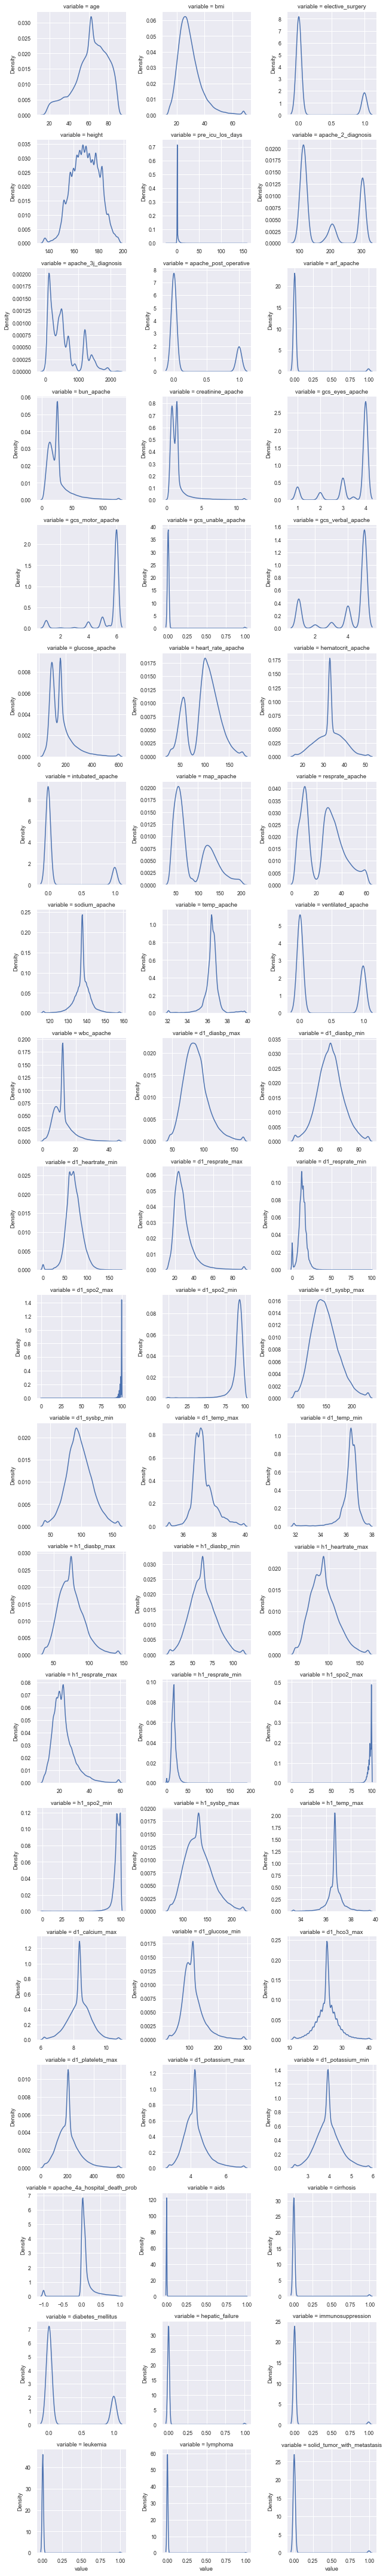

In [42]:
unpivot = pd.melt(new_df, new_df.describe().columns[0],new_df.describe().columns[1:])
g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

In [43]:
categorical_columns.append('icu_type')
new_df[categorical_columns]

,apache_3j_bodysystem,apache_2_bodysystem,ethnicity,gender,icu_type
0,Sepsis,Cardiovascular,Caucasian,M,CTICU
1,Respiratory,Respiratory,Caucasian,F,Med-Surg ICU
2,Metabolic,Metabolic,Caucasian,F,Med-Surg ICU
3,Cardiovascular,Cardiovascular,Caucasian,F,CTICU
5,Neurological,Neurologic,Caucasian,M,Med-Surg ICU
...,...,...,...,...,...
91708,Sepsis,Cardiovascular,Caucasian,M,Cardiac ICU
91709,Sepsis,Cardiovascular,Caucasian,F,Med-Surg ICU
91710,Metabolic,Metabolic,Caucasian,M,Med-Surg ICU
91711,Respiratory,Respiratory,Caucasian,F,Med-Surg ICU


In [45]:
new_df = pd.get_dummies(new_df,drop_first=False,columns=categorical_columns,dtype= 'int64')
new_df.reset_index(drop=True,inplace=True)

In [46]:
from sklearn.model_selection import train_test_split

X = new_df.drop(['hospital_death'], axis=1)
y = new_df['hospital_death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    random_state=11,
                                                    stratify = y)

In [47]:
print(X_train.shape)
print(y_train.shape)

(61798, 97)
(61798,)


In [48]:



# Neural network
model = Sequential()
model.add(Dense(200, input_dim=97, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [49]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.0001)

In [50]:
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
966/966 [==============================] - 4s 3ms/step - loss: 0.3143 - accuracy: 0.9072 - val_loss: 0.2728 - val_accuracy: 0.9144
Epoch 2/100
966/966 [==============================] - 3s 3ms/step - loss: 0.2627 - accuracy: 0.9116 - val_loss: 0.2628 - val_accuracy: 0.9148
Epoch 3/100
966/966 [==============================] - 3s 3ms/step - loss: 0.2547 - accuracy: 0.9134 - val_loss: 0.2522 - val_accuracy: 0.9157
Epoch 4/100
966/966 [==============================] - 3s 3ms/step - loss: 0.2501 - accuracy: 0.9140 - val_loss: 0.2475 - val_accuracy: 0.9152
Epoch 5/100
966/966 [==============================] - 3s 4ms/step - loss: 0.2474 - accuracy: 0.9147 - val_loss: 0.2476 - val_accuracy: 0.9157
Epoch 6/100
966/966 [==============================] - 6s 6ms/step - loss: 0.2446 - accuracy: 0.9156 - val_loss: 0.2470 - val_accuracy: 0.9162
Epoch 7/100
966/966 [==============================] - 4s 4ms/step - loss: 0.2434 - accuracy: 0.9155 - val_loss: 0.2427 - val_accuracy: 0.9163

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()